#LSTM Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Reshape, BatchNormalization


num_features = X_processed.shape[1]  
# Original input shape for dense model
input_shape = (num_features,)  

LSTM_model = Sequential([
    # Reshaped input to (1, num_features) for LSTM
    Reshape((1, num_features), input_shape=input_shape),
    LSTM(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    BatchNormalization(),
    Dense(3, activation='softmax')  # Assuming a classification task with 3 classes
])

# Compile the model
LSTM_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


LSTM_model.summary()


Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_15 (Reshape)        (None, 1, 31)             0         
                                                                 
 lstm_15 (LSTM)              (None, 128)               81920     
                                                                 
 batch_normalization_3 (Bat  (None, 128)               512       
 chNormalization)                                                
                                                                 
 dense_19 (Dense)            (None, 3)                 387       
                                                                 
Total params: 82819 (323.51 KB)
Trainable params: 82563 (322.51 KB)
Non-trainable params: 256 (1.00 KB)
_________________________________________________________________


In [ ]:
history = LSTM_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10, batch_size=32)

Epoch 1/10
1534/1534 [==============================] - 19s 10ms/step - loss: 0.5845 - accuracy: 0.7821 - val_loss: 0.4841 - val_accuracy: 0.8130
Epoch 2/10
1534/1534 [==============================] - 17s 11ms/step - loss: 0.4987 - accuracy: 0.7972 - val_loss: 0.4845 - val_accuracy: 0.7998
Epoch 3/10
1534/1534 [==============================] - 16s 11ms/step - loss: 0.4838 - accuracy: 0.7992 - val_loss: 0.4578 - val_accuracy: 0.8162
Epoch 4/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.4770 - accuracy: 0.7999 - val_loss: 0.4582 - val_accuracy: 0.8091
Epoch 5/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.4701 - accuracy: 0.8022 - val_loss: 0.4562 - val_accuracy: 0.8166
Epoch 6/10
1534/1534 [==============================] - 8s 5ms/step - loss: 0.4681 - accuracy: 0.8033 - val_loss: 0.4483 - val_accuracy: 0.8153
Epoch 7/10
1534/1534 [==============================] - 9s 6ms/step - loss: 0.4634 - accuracy: 0.8050 - val_loss: 0.4359 - val_acc

In [ ]:
LSTM_model.save('LSTM_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from google.colab import files
files.download('LSTM_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
_, accuracy = LSTM_model.evaluate(X_test, y_test)

print(f"Accuracy: {accuracy * 100:.2f}%")

192/192 [==============================] - 1s 3ms/step - loss: 0.4549 - accuracy: 0.8019
Accuracy: 80.19%


192/192 [==============================] - 1s 3ms/step


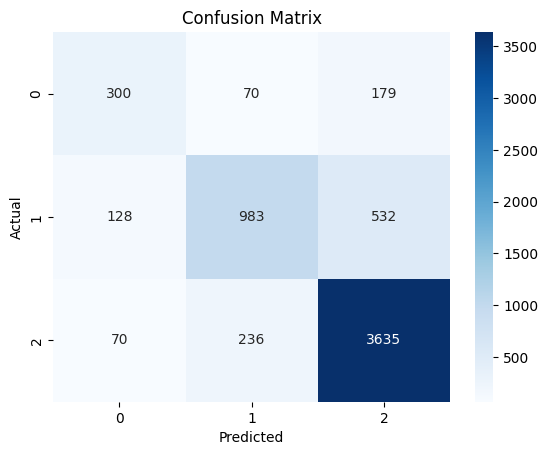

In [ ]:
#hard = 0 , med = 1 , soft = 2
# Make predictions on the validation set
y_test_pred_prob = LSTM_model.predict(X_test)
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix using seaborn
labels = np.unique(y_test)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels and title to the plot
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')

# Display the plot
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
y_test_pred_prob = LSTM_model.predict(X_test)

# Convert predicted probabilities to predicted labels
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Calculate evaluation metrics for the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

# Calculate and print the average evaluation metrics for the test set
print('Average Test Accuracy:', np.mean(test_accuracy))
print('Average Test Precision:', np.mean(test_precision))
print('Average Test Recall:', np.mean(test_recall))
print('Average Test F1 Score:', np.mean(test_f1))

192/192 [==============================] - 2s 8ms/step
Average Test Accuracy: 0.8018914071416925
Average Test Precision: 0.7338058663113464
Average Test Recall: 0.6890328733661087
Average Test F1 Score: 0.7069585421389566


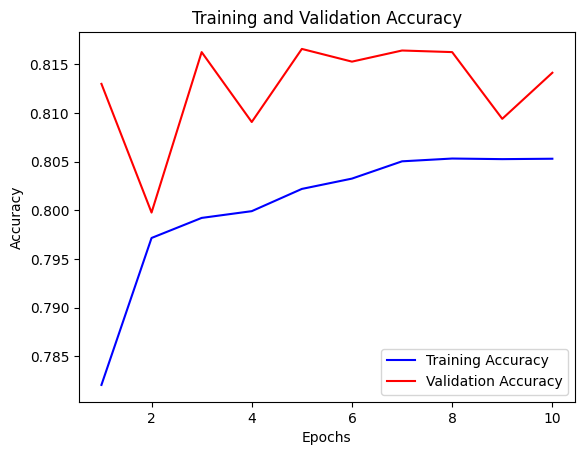

In [ ]:
# Get the accuracy values from the training history
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the accuracy graph
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()